In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text", "target"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)


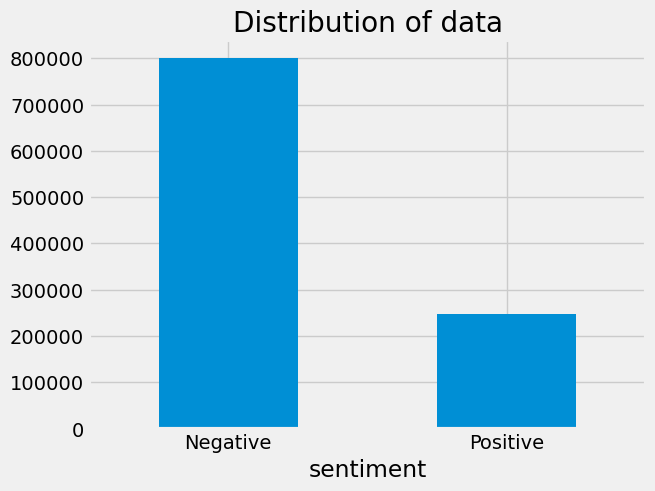

In [5]:
dataset = dataset[['sentiment','text']]

dataset['sentiment'] = dataset['sentiment'].replace(4,1)
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

text, sentiment= list(dataset['text']), list(dataset['sentiment'])

In [6]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [8]:
import re

In [9]:
def preprocess(text):
    text = re.sub(r"http\S+|@\w+|#\w+", "", text)
    text = re.sub(r"[^\w\s]", "", text) 
    text = text.lower()
    return text

dataset['text'] = dataset['text'].fillna('missing_text').apply(preprocess)
X = dataset['text']
y = dataset['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

text_clf.fit(X_train, y_train)

predicted = text_clf.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88    160127
           1       0.92      0.09      0.17     49589

    accuracy                           0.78    209716
   macro avg       0.85      0.55      0.52    209716
weighted avg       0.81      0.78      0.71    209716



In [10]:
def get_response(user_input):
    processed_input = preprocess(user_input)
    prediction = model.predict(processed_input)
    return response_mapping[prediction.argmax()]

In [ ]:
def predict_intent(user_input):
    user_input_vec = vectorizer.transform([user_input])
    intent = model.predict(user_input_vec)[0]
    return intent

def get_response(user_input):
    if intent == 'greeting':
        response = "Hello! Do you need any assistance today?"
    elif intent == 'discussions':
        response = "The country's GDP defines its status."
    elif intent == 'farewell':
        response = " Goodbye! Take care."
    return response

while True:
    user_input = input ("User:")
    intent = predict_intent(user_input)
    response= get_response(user_input)
    print("Chatbot:", response)
    